In [1]:
%matplotlib inline

import sys
sys.path.append("../")
import copy
import itertools
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.simplefilter('ignore')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [4]:
dataframe=pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
dataframe['Province/State']=dataframe['Province/State'].fillna('')
dataframe.rename(columns={'Country/Region':'Country','Province/State':'State'},inplace=True)
dataframe

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0
1,,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,,Angola,-11.202700,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
32060,,Sao Tome and Principe,0.186360,6.613081,2020-05-21,251,8,4
32061,,Yemen,15.552727,48.516388,2020-05-21,197,33,0
32062,,Comoros,-11.645500,43.333300,2020-05-21,34,1,8
32063,,Tajikistan,38.861034,71.276093,2020-05-21,2350,44,0


In [5]:
q=dataframe.query('Country=="Italy"')
df=q.fillna('').groupby(['Date'])['Confirmed'].max()
df=pd.DataFrame(df)
df

,Confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-17,225435
2020-05-18,225886
2020-05-19,226699


In [6]:
train = df[0:97]
test = df[97:]
ploting = df[45:97]

In [7]:

column_name = df.columns[0]


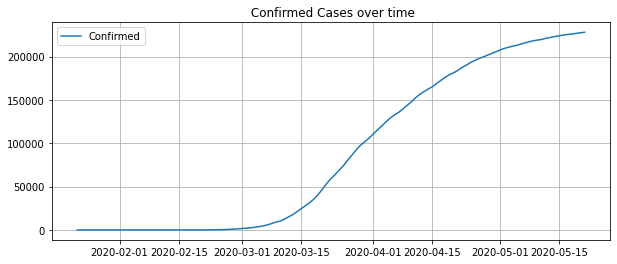

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df, label=column_name)
plt.legend(loc="best")
plt.title(" %s Cases over time" %df.columns[0])
plt.grid()
plt.show()

In [9]:
df.tail()

,Confirmed
Date,
2020-05-17,225435
2020-05-18,225886
2020-05-19,226699
2020-05-20,227364
2020-05-21,228006


In [10]:
def fit_model(series, config):
    order, sorder, trend = config
    model = SARIMAX(series[column_name], order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    result = model.fit()
    return result

In [11]:
# root mean squared error
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [12]:
#bests = [(2, 2, 2), (0, 1, 2, 5), 'ct']
best=[(1, 2, 1), (1, 1, 1, 12), 'c']
result = fit_model(train, best)
#result=get_forecast(steps=500)
#predictions1 = result.predic0(start=80, end=121)
#yhat = fit_model.forecast()[0]
#result.plot_predict(start=int(len(train) * 0.6), end=int(len(train) * 2.0))
prediction=result.forecast(steps=len(test))
prediction

2020-04-28    201117.498589
2020-04-29    202823.401119
2020-04-30    204350.685411
2020-05-01    205990.439476
2020-05-02    207683.558900
2020-05-03    209301.970891
2020-05-04    210728.828360
2020-05-05    212149.508615
2020-05-06    213610.538066
2020-05-07    215121.064570
2020-05-08    216639.497262
2020-05-09    217777.285086
2020-05-10    219111.799732
2020-05-11    220354.229486
2020-05-12    221440.515692
2020-05-13    222518.985662
2020-05-14    223488.613829
2020-05-15    224457.492740
2020-05-16    225359.466449
2020-05-17    226112.182777
2020-05-18    226943.752286
2020-05-19    227682.672579
2020-05-20    228403.245974
2020-05-21    228688.741136
Freq: D, dtype: float64

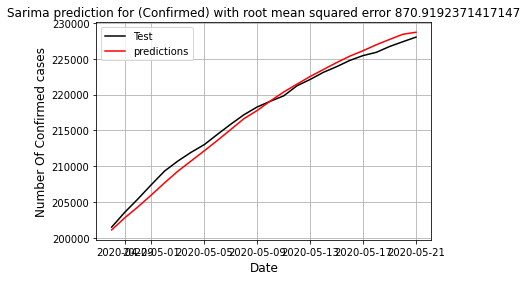

In [13]:
#result.plot_predict(start=int(len(test) * 0.6), end=int(len(test) * 2.0))
plt.figure(figsize=(6,4))
plt.plot(test, label="Test" ,color='black')
plt.plot(prediction, color="red", label="predictions")
plt.grid()
error = measure_rmse(test, prediction)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number Of Confirmed cases', fontsize=12)
plt.legend(loc='best')
plt.title("Sarima prediction for (%s) with root mean squared error %s" % (column_name, error))
plt.show()

In [14]:
# Get forecast 90 steps ahead in future
forecastt = result.get_forecast(steps=90)
forecastt

# Get confidence intervals of forecasts
forecast_conf = forecastt.conf_int()


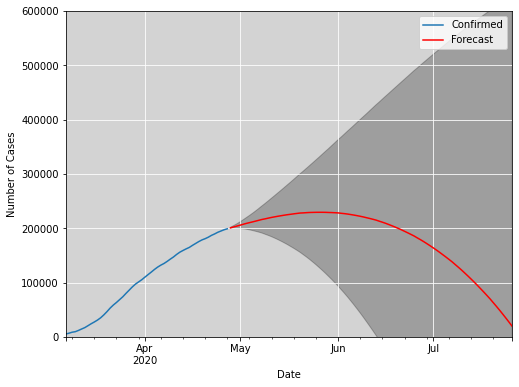

In [15]:
ax = ploting.plot(label='observed', figsize=(8, 6))
forecastt.predicted_mean.plot(ax=ax, label='Forecast', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 1],
                       forecast_conf.iloc[:, 0], color='k', alpha=.25)

plt.grid(color='white')
bg_color = 'lightgrey'
ax.patch.set_facecolor(bg_color)
axes = plt.gca()
axes.set_ylim([0,600000])       
plt.legend()
plt.show()


**Recovered** **Cases**

In [ ]:
qc=dataframe.query('Country=="Italy"')
dfr=q.fillna('').groupby(['Date'])['Recovered'].max()
dfr=pd.DataFrame(dfr)

In [ ]:
dfr

,Recovered
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-17,125176
2020-05-18,127326
2020-05-19,129401


In [ ]:
column_name = dfr.columns[0]


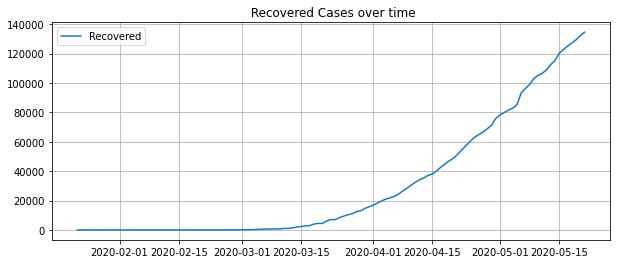

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(dfr, label=column_name)
plt.legend(loc="best")
plt.title(" %s Cases over time" %dfr.columns[0])
plt.grid()
plt.show()

In [ ]:
Train = dfr[0:97]
Test = dfr[97:]
ploting1 = dfr[45:97]

In [ ]:
best=[(1, 2, 2), (2, 0, 2, 7), 'n']
results = fit_model(Train, best)
Prediction=results.forecast(steps=len(Test))
Prediction

2020-04-28     69082.121276
2020-04-29     71395.764502
2020-04-30     74095.483920
2020-05-01     76945.394353
2020-05-02     79643.527374
2020-05-03     82109.389114
2020-05-04     84419.686763
2020-05-05     87236.802134
2020-05-06     90050.622717
2020-05-07     93076.391977
2020-05-08     96139.323307
2020-05-09     99043.800309
2020-05-10    101591.955106
2020-05-11    104030.690670
2020-05-12    106940.354812
2020-05-13    109801.381905
2020-05-14    112885.934623
2020-05-15    116036.325248
2020-05-16    119064.139285
2020-05-17    121851.542037
2020-05-18    124537.824635
2020-05-19    127606.605891
2020-05-20    130651.792044
2020-05-21    133869.253845
Freq: D, dtype: float64

In [ ]:
Test

,Recovered
Date,
2020-04-28,68941
2020-04-29,71252
2020-04-30,75945
2020-05-01,78249
2020-05-02,79914
2020-05-03,81654
2020-05-04,82879
2020-05-05,85231
2020-05-06,93245


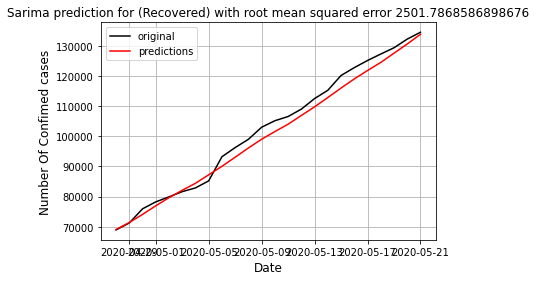

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(Test, label="original" ,color='black')
plt.plot(Prediction, color="red", label="predictions")
plt.grid()
error = measure_rmse(Test, Prediction)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number Of Confimed cases', fontsize=12)
plt.legend(loc='best')
plt.title("Sarima prediction for (%s) with root mean squared error %s" % (column_name, error))
plt.show()

In [ ]:
# Get forecast 90 steps ahead in future
forecastt = results.get_forecast(steps=90)
forecastt

# Get confidence intervals of forecasts
forecast_conf = forecastt.conf_int()


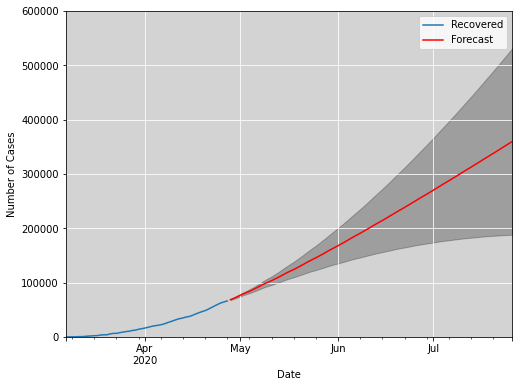

In [ ]:
ax = ploting1.plot(label='observed', figsize=(8, 6))
forecastt.predicted_mean.plot(ax=ax, label='Forecast', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 1],
                       forecast_conf.iloc[:, 0], color='k', alpha=.25)

plt.grid(color='white')
bg_color = 'lightgrey'
ax.patch.set_facecolor(bg_color)
axes = plt.gca()
axes.set_ylim([0,600000])       
plt.legend()
plt.show()

**Deaths** **Cases** **Forecasting**


In [16]:
q=dataframe.query('Country=="Italy"')
df=q.fillna('').groupby(['Date'])['Deaths'].max()
dfd=pd.DataFrame(df)
dfd

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-17,31908
2020-05-18,32007
2020-05-19,32169


In [17]:
column_name = dfd.columns[0]


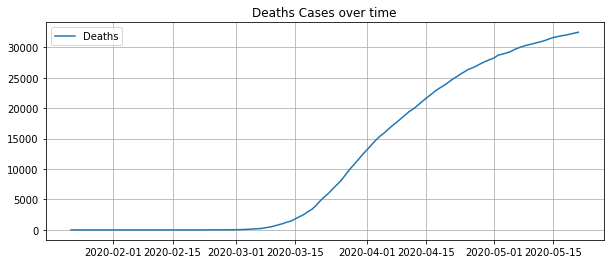

In [18]:
plt.figure(figsize=(10,4))
plt.plot(dfd, label=column_name)
plt.legend(loc="best")
plt.title("%s Cases over time" %dfd.columns[0])
plt.grid()
plt.show()

In [19]:
Traind = dfd[0:97]
Testd = dfd[97:]
ploting2 = dfd[45:97]

In [20]:
best_com=[(2, 2, 2), (2, 0, 2, 7), 'n']
resultd = fit_model(Traind, best_com)
Prediction1=resultd.forecast(steps=len(Testd))
Prediction1

2020-04-28    27341.001971
2020-04-29    27626.232084
2020-04-30    27939.564428
2020-05-01    28276.735111
2020-05-02    28600.462166
2020-05-03    28852.994868
2020-05-04    29165.830683
2020-05-05    29488.007136
2020-05-06    29763.330267
2020-05-07    30046.278659
2020-05-08    30375.033980
2020-05-09    30673.349642
2020-05-10    30954.111498
2020-05-11    31266.943884
2020-05-12    31587.245786
2020-05-13    31873.304164
2020-05-14    32167.941878
2020-05-15    32488.935425
2020-05-16    32791.405401
2020-05-17    33076.631265
2020-05-18    33386.495722
2020-05-19    33700.580744
2020-05-20    33990.884853
2020-05-21    34287.507124
Freq: D, dtype: float64

In [21]:
Testd

,Deaths
Date,
2020-04-28,27359
2020-04-29,27682
2020-04-30,27967
2020-05-01,28236
2020-05-02,28710
2020-05-03,28884
2020-05-04,29079
2020-05-05,29315
2020-05-06,29684


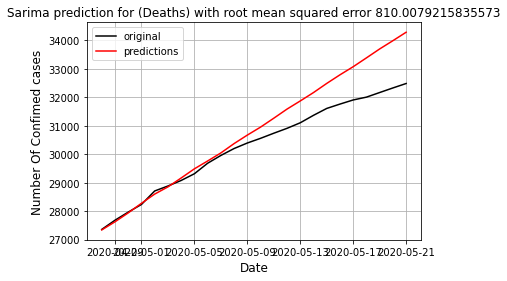

In [22]:
plt.figure(figsize=(6,4))
plt.plot(Testd, label="original" ,color='black')
plt.plot(Prediction1, color="red", label="predictions")
plt.grid()
error = measure_rmse(Testd, Prediction1)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number Of Confimed cases', fontsize=12)
plt.legend(loc='best')
plt.title("Sarima prediction for (%s) with root mean squared error %s" % (column_name, error))
plt.show()

In [23]:
# Get forecast 90 steps ahead in future
forecastt = resultd.get_forecast(steps=90)
forecastt

# Get confidence intervals of forecasts
forecast_conf = forecastt.conf_int()

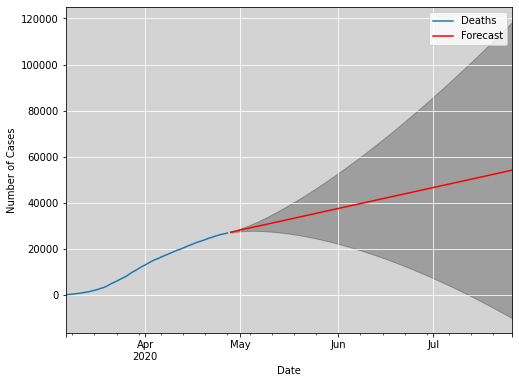

In [24]:
ax = ploting2.plot(label='observed', figsize=(8, 6))
forecastt.predicted_mean.plot(ax=ax, label='Forecast', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 1],
                       forecast_conf.iloc[:, 0], color='k', alpha=.25)

plt.grid(color='white')
bg_color = 'lightgrey'
ax.patch.set_facecolor(bg_color)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,600000])       
plt.legend()
plt.show()